In [ ]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_posted_date'] = df['job_posted_date'].dt.date
import ast
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\foranac\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
df_Irl = df[df['job_country']== 'Ireland'].dropna(subset='salary_year_avg')
job_titles = df_Irl['job_title_short'].value_counts().head(6).index.to_list()
df_Irl_top6 = df_Irl[df_Irl['job_title_short'].isin(job_titles)]
job_order = df_Irl_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order

Index(['Machine Learning Engineer', 'Senior Data Scientist',
       'Senior Data Engineer', 'Data Engineer', 'Data Scientist',
       'Data Analyst'],
      dtype='object', name='job_title_short')

C:\Users\user\AppData\Local\Temp\ipykernel_16160\1774587251.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_Irl_top6, x='salary_year_avg', y='job_title_short', palette='dark:g',order=job_order)


Text(0.5, 1.0, 'Salary Distributions in Ireland')

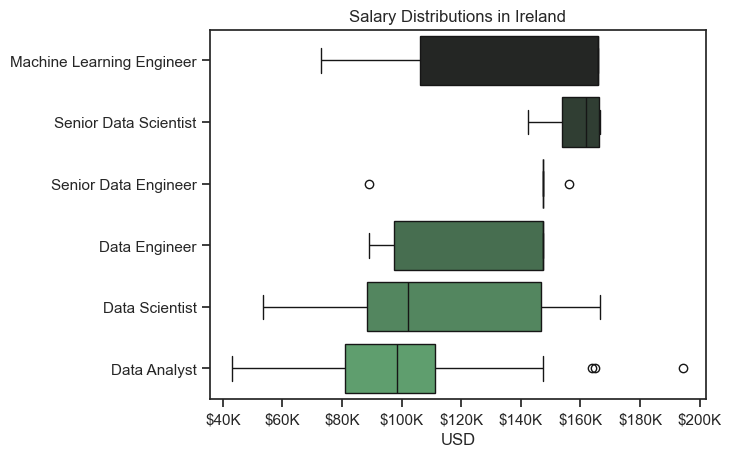

In [36]:
sns.boxplot(data=df_Irl_top6, x='salary_year_avg', y='job_title_short', palette='dark:g',order=job_order)
x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(x)
sns.set_theme(style='ticks')
plt.xlabel('USD')
plt.ylabel('')
plt.title('Salary Distributions in Ireland')